In [49]:
import pandas as pd

In [50]:
df = pd.read_csv('../clg-adm/admission_data.csv')
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [51]:
df['University Rating'].unique()

array([4, 3, 2, 5, 1])

In [52]:
df['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [53]:
df['LOR '].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [54]:
target = df['Chance of Admit ']
df1 = df.drop(['Chance of Admit '],axis='columns')

In [55]:
target

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [57]:
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


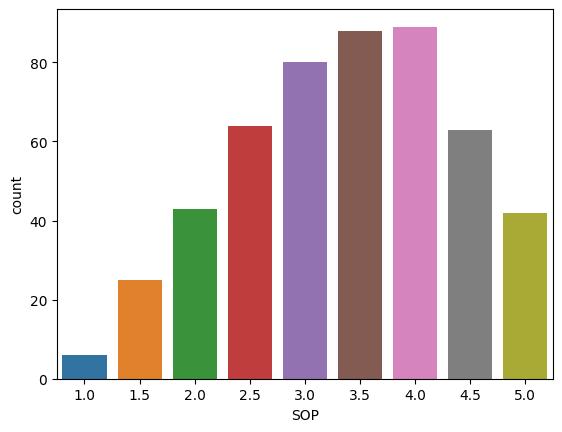

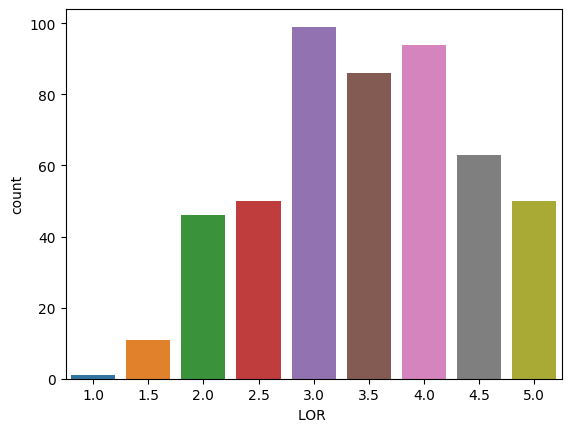

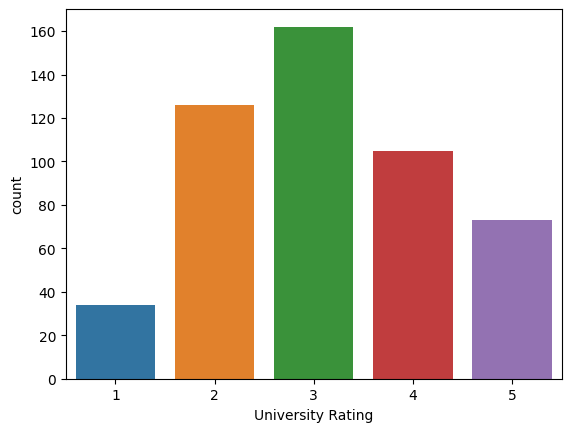

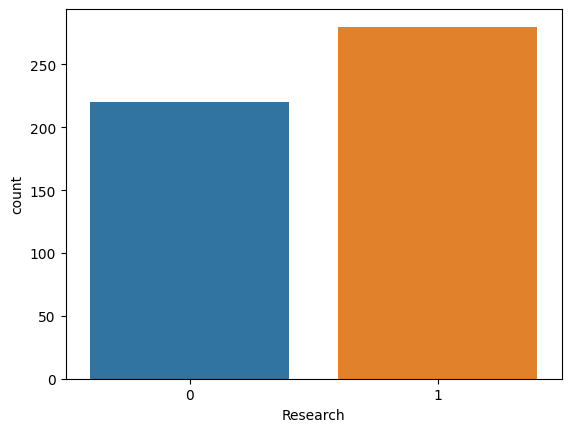

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
f1 = ['SOP',"LOR ","University Rating","Research"]
for i,cols in enumerate(f1):
    plt.figure(i)
    sns.countplot(x=df1[cols],data=df1)

sop : 2.5-4.5
lor : 3-4.5
university rating : 2-4

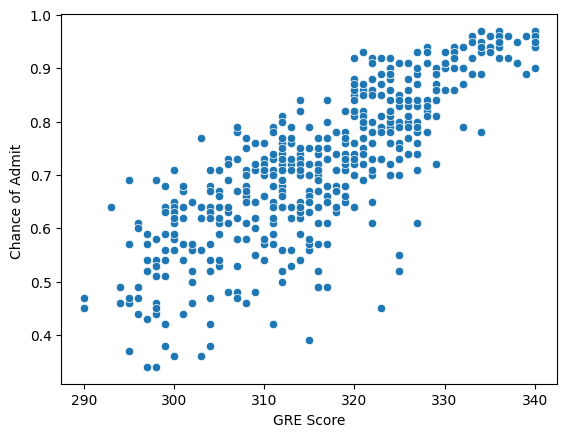

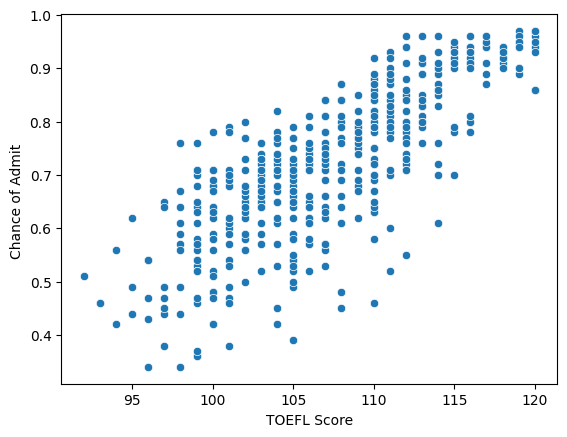

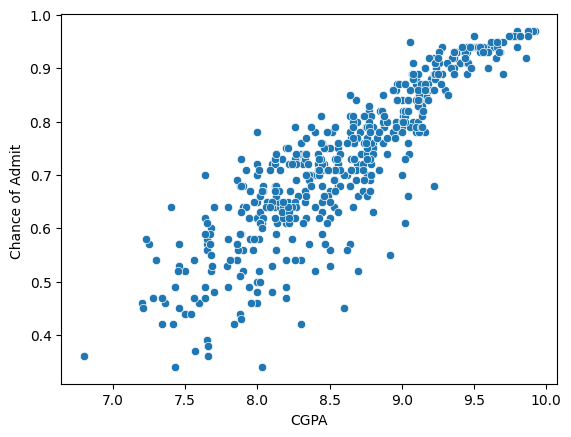

In [61]:
f2 = ['GRE Score','TOEFL Score','CGPA']
for i,cols in enumerate(f2):
    plt.figure(i)
    sns.scatterplot(x=df1[cols],data=df1,y=target)

<AxesSubplot: >

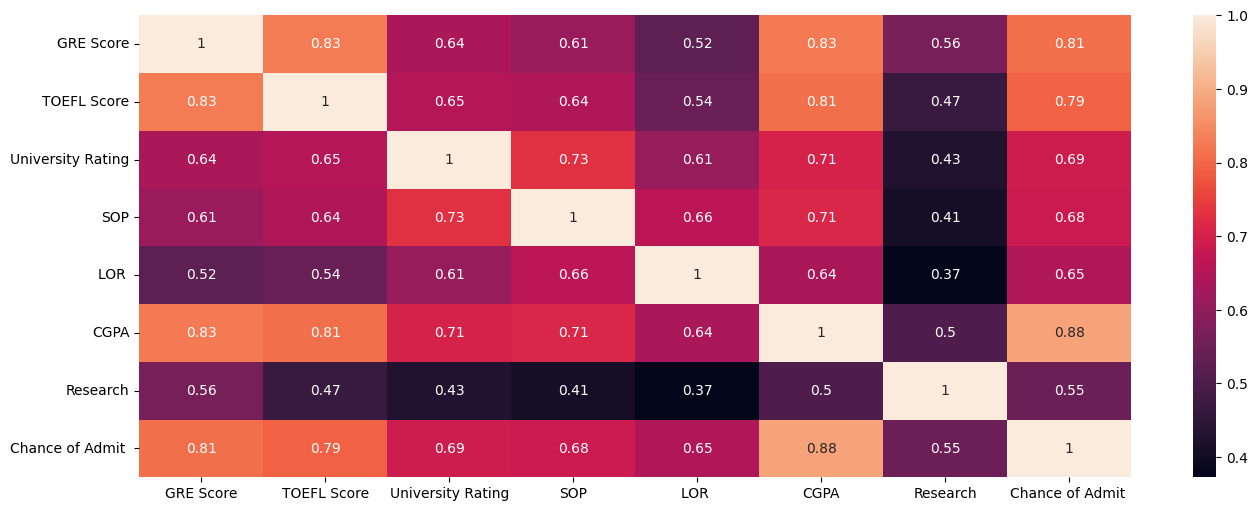

In [62]:
plt.figure(figsize=(16,6))
sns.heatmap(df[df.columns].corr(),annot=True)

every column is dependent on each other

In [63]:
df1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000


In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df1)
x_scaled

array([[0.94      , 0.92857143, 0.75      , ..., 0.875     , 0.91346154,
        1.        ],
       [0.68      , 0.53571429, 0.75      , ..., 0.875     , 0.66346154,
        1.        ],
       [0.52      , 0.42857143, 0.5       , ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.8       , 1.        , 1.        , ..., 1.        , 0.88461538,
        1.        ],
       [0.44      , 0.39285714, 0.75      , ..., 1.        , 0.5224359 ,
        0.        ],
       [0.74      , 0.75      , 0.75      , ..., 0.875     , 0.71794872,
        0.        ]])

In [64]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, target, test_size=0.3, random_state=20)

In [108]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

model_params={
'linear_regression':{
'model': LinearRegression(),
'params': {}
},
'ridge':{
'model': Ridge(),
'params':{
'alpha':[0.01,0.1,1,10]
}
},
'lasso':{
'model': Lasso(),
'params':{
'alpha':[0.01,0.1,1,10]
}
},
'elastic_net':{
'model': ElasticNet(),
'params':{
'alpha':[0.01,0.1,1,10],
'l1_ratio':[0.1,0.3,0.5,0.7,0.9]
}
},
'random_forest_regression':{
'model': RandomForestRegressor(),
'params':{
'n_estimators':[1,5,10,100]
}
},
'decision_tree_regression':{
'model': DecisionTreeRegressor(),
'params':{
'criterion':['mse','friedman_mse','mae','poisson'],
'splitter':['best','random']
}
}
}

In [109]:
from sklearn.model_selection import GridSearchCV
scores=[]

for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-package

In [110]:
df_scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_scores

,model,best_score,best_params
0,linear_regression,0.826296,{}
1,ridge,0.826434,{'alpha': 0.1}
2,lasso,0.676959,{'alpha': 0.01}
3,elastic_net,0.813298,"{'alpha': 0.01, 'l1_ratio': 0.1}"
4,random_forest_regression,0.789243,{'n_estimators': 100}
5,decision_tree_regression,0.615098,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [111]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
Y_pred = ridge.predict(X_test)

In [112]:
Y_pred

array([0.88577955, 0.6630744 , 0.94213792, 0.83147311, 0.51615508,
       0.65147398, 0.6382795 , 0.88916415, 0.48773759, 0.86018524,
       0.58639853, 0.80734105, 0.57490026, 0.54595939, 0.50001467,
       0.7970566 , 0.72395376, 0.86258676, 0.55060149, 0.66278529,
       0.7175341 , 0.47809735, 0.72558518, 0.80071812, 0.9027912 ,
       0.64720414, 0.5652028 , 0.65689126, 0.93528   , 0.70600002,
       0.69431747, 0.6008335 , 0.81305712, 0.5862724 , 0.85683234,
       0.64296738, 0.7998904 , 0.53822069, 0.65305008, 0.66883497,
       0.96063116, 0.82686443, 0.70767331, 0.7650549 , 0.7622481 ,
       0.72264854, 0.74290899, 0.93085301, 0.89504648, 0.48095654,
       0.65386804, 0.63707873, 0.72983486, 0.6816553 , 0.6156589 ,
       0.65116438, 0.83045118, 0.72734431, 0.7828058 , 0.78939742,
       0.86884131, 0.75204777, 0.94161222, 0.92815782, 0.6958164 ,
       0.55616728, 0.86712762, 0.66743949, 0.64603204, 0.70806791,
       0.77780788, 0.8426837 , 0.52476192, 0.73950156, 0.72947